==================================================
# Examples for fitting histograms
==================================================

### author Sylvie Dagoret-Campagne
### date May 17th 2016

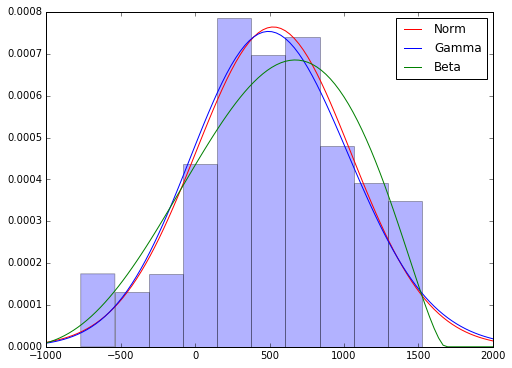

In [3]:
#
#  Try to fit 3 kinds of functions
#   - normal
#   - gamma
#   - beta
#
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt
%matplotlib inline

# create some normal random noisy data
ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
plt.figure(figsize=(8.,6.))

plt.hist(ser, normed=True,alpha=0.3)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
m, s = stats.norm.fit(ser) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g,'r-' ,label="Norm") # plot it


# exactly same as above
ag,bg,cg = stats.gamma.fit(ser)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma,'b-', label="Gamma")
 

# guess what :) 
ab,bb,cb,db = stats.beta.fit(ser)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta,'g-', label="Beta")
plt.legend()
plt.show()  


Distribution fitting with scipy
Distribution fitting is the procedure of selecting a statistical distribution that best fits to a dataset generated by some random process. In this post we will see how to fit a distribution using the techniques implemented in the Scipy library.
This is the first snippet:

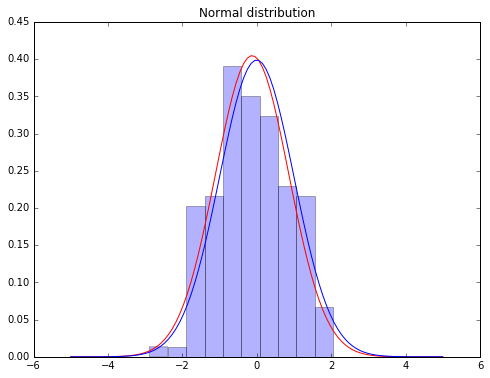

In [4]:
from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist,figure,title

# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
samp = norm.rvs(loc=0,scale=1,size=150) 

param = norm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(-5,5,100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = norm.pdf(x)

figure(figsize=(8.,6.))

title('Normal distribution')
plot(x,pdf_fitted,'r-',x,pdf,'b-')
hist(samp,normed=1,alpha=.3)

show()


In the code above a dataset of 150 samples have been created using a normal distribution with mean 0 and standar deviation 1, then a fitting procedure have been applied on the data. In the figure we can see the original distribution (blue curve) and the fitted distribution (red curve) and we can observe that they are really similar.
Let's do the same with a Rayleigh distribution: 

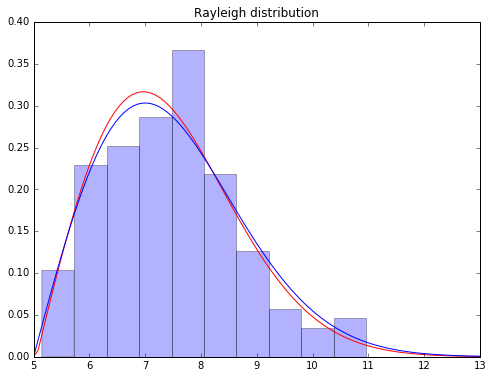

In [5]:
from scipy.stats import norm,rayleigh

samp = rayleigh.rvs(loc=5,scale=2,size=150) # samples generation

param = rayleigh.fit(samp) # distribution fitting

x = linspace(5,13,100)
# fitted distribution
pdf_fitted = rayleigh.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = rayleigh.pdf(x,loc=5,scale=2)

plt.figure(figsize=(8.,6.))

title('Rayleigh distribution')
plot(x,pdf_fitted,'r-',x,pdf,'b-')
hist(samp,normed=1,alpha=.3)

show()

http://pythonhosted.org/PyQt-Fit/KDE_tut.html

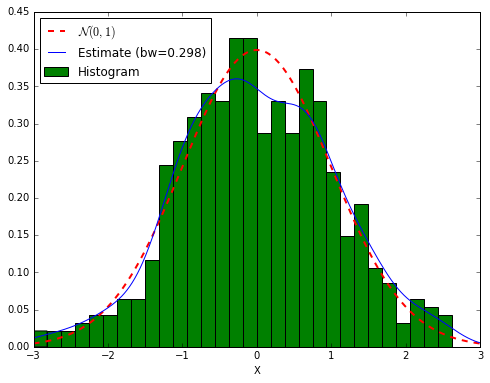

In [6]:
import numpy as np
from scipy.stats import norm
from matplotlib import pylab as plt

f = norm(loc=0, scale=1)
x = f.rvs(500)
xs = np.r_[-3:3:1024j]
ys = f.pdf(xs)

plt.figure(figsize=(8.,6.))

h = plt.hist(x, bins=30, normed=True, color=(0,.5,0,1), label='Histogram')
plt.plot(xs, ys, 'r--', linewidth=2, label='$\mathcal{N}(0,1)$')
plt.xlim(-3,3)
plt.xlabel('X')

from pyqt_fit import kde
est = kde.KDE1D(x)
plot(xs, est(xs), label='Estimate (bw={:.3g})'.format(est.bandwidth))
plt.legend(loc='best')
plt.show()


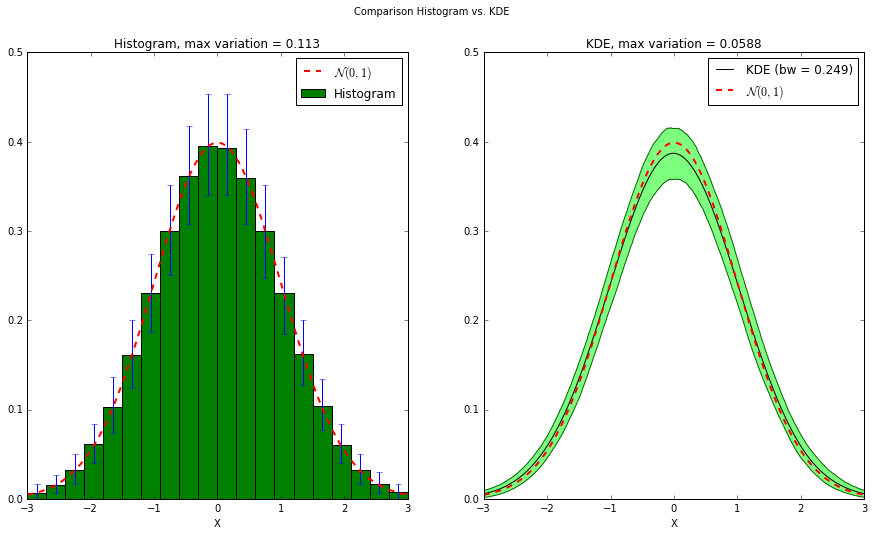

In [7]:
import numpy as np
from scipy.stats import norm
from pyqt_fit import kde
f = norm(loc=0, scale=1)
xs = np.r_[-3:3:1024j]
nbins = 20
x = f.rvs(1000*1000).reshape(1000,1000)
hs = np.empty((1000, nbins), dtype=float)
kdes = np.empty((1000, 1024), dtype=float)
hs[0], edges = np.histogram(x[0], bins=nbins, range=(-3,3), density=True)
mod = kde.KDE1D(x[0])
mod.fit()  # Force estimation of parameters
mod.bandwidth = mod.bandwidth  # Prevent future recalculation
kdes[0] = mod(xs)
for i in range(1, 1000):
    hs[i] = np.histogram(x[i], bins=nbins, range=(-3,3), density=True)[0]
    mod.xdata = x[i]
    kdes[i] = mod(xs)


h_mean = hs.mean(axis=0)
h_ci = np.array(np.percentile(hs, (5, 95), axis=0))
h_err = np.empty(h_ci.shape, dtype=float)
h_err[0] = h_mean - h_ci[0]
h_err[1] = h_ci[1] - h_mean
kde_mean = kdes.mean(axis=0)
kde_ci = np.array(np.percentile(kdes, (5, 95), axis=0))
width = edges[1:]-edges[:-1]

fig = plt.figure(figsize=(15,8))

#left fig
ax1 = fig.add_subplot(1,2,1)
ax1.bar(edges[:-1], h_mean, yerr=h_err, width = width, label='Histogram',facecolor='g', edgecolor='k', ecolor='b')
ax1.plot(xs, f.pdf(xs), 'r--', lw=2, label='$\mathcal{N}(0,1)$')
ax1.set_xlabel('X')
ax1.set_xlim(-3,3)
ax1.legend(loc='best')

#right fig
ax2 = fig.add_subplot(1,2,2)
ax2.fill_between(xs, kde_ci[0], kde_ci[1], color=(0,1,0,.5), edgecolor=(0,.4,0,1))
ax2.plot(xs, kde_mean, 'k', label='KDE (bw = {:.3g})'.format(mod.bandwidth))
ax2.plot(xs, f.pdf(xs), 'r--', lw=2, label='$\mathcal{N}(0,1)$')
ax2.set_xlabel('X')
ax2.legend(loc='best')
ymax = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax2.set_ylim(0, ymax)
ax1.set_ylim(0, ymax)
ax1.set_title('Histogram, max variation = {:.3g}'.format((h_ci[1] - h_ci[0]).max()))
ax2.set_title('KDE, max variation = {:.3g}'.format((kde_ci[1] - kde_ci[0]).max()))
fig.suptitle('Comparison Histogram vs. KDE')

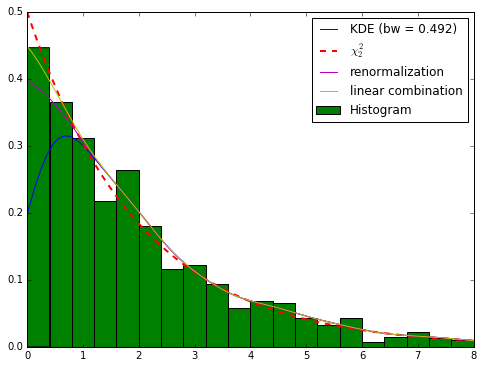

In [8]:
from scipy import stats
from matplotlib import pylab as plt
from pyqt_fit import kde, kde_methods
import numpy as np

fig = plt.figure(figsize=(8,6))


chi2 = stats.chi2(2)
x = chi2.rvs(1000)
plt.hist(x, bins=20, range=(0,8), color=(0,.5,0), label='Histogram', normed=True)

est = kde.KDE1D(x)
xs = np.r_[0:8:1024j]
plt.plot(xs, est(xs), label='KDE (bw = {:.3g})'.format(est.bandwidth))
plt.plot(xs, chi2.pdf(xs), 'r--', lw=2, label=r'$\chi^2_2$')
plt.legend(loc='best')

from scipy import integrate
integrate.quad(est, 0, np.inf)
est_ren = kde.KDE1D(x, lower=0, method=kde_methods.renormalization)
plt.plot(xs, est_ren(xs), 'm', label=est_ren.method.name)
plt.legend(loc='best')

from pyqt_fit import kde_methods
est_lin = kde.KDE1D(x, lower=0, method=kde_methods.linear_combination)
plt.plot(xs, est_lin(xs), 'y', label=est_lin.method.name)
plt.legend(loc='best')

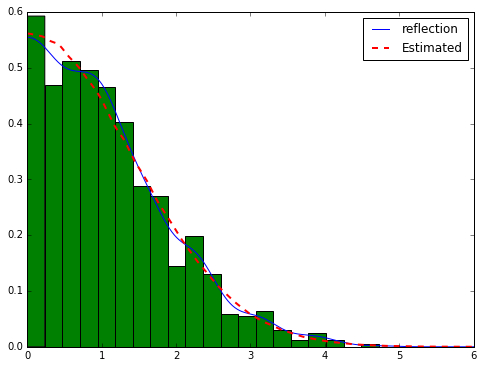

In [9]:
from scipy import stats, integrate
from matplotlib import pylab as plt
from pyqt_fit import kde, kde_methods
import numpy as np
f = stats.norm(loc=0, scale=1)
x = f.rvs(1000)
y = f.rvs(1000)
z = np.abs(x-y)


fig = plt.figure(figsize=(8,6))

plt.hist(z, bins=20, facecolor=(0,.5,0), normed=True)

xs = np.r_[0:8:1024j]
est = kde.KDE1D(z, lower=0, method=kde_methods.reflection)
plot(xs, est(xs), color='b', label=est.method.name)


xx = f.rvs(1000000)
yy = f.rvs(1000000)
zz = np.abs(xx-yy)

est_large = kde.KDE1D(zz, lower=0, method=kde_methods.reflection)
xxs, yys = est_large.grid()
plt.plot(xxs, yys, 'r--', lw=2, label='Estimated')
plt.xlim(0, 6)
plt.ylim(ymin=0)
plt.legend(loc='best')




In [10]:
est = kde.KDE1D(x, bandwidth=.1)
est.bandwidth = .2

est = kde.KDE1D(x, bandwidth=.01)
est.covariance = .04

est = kde.KDE1D(x, covariance = kde.scotts_covariance)

def my_scotts(x, model=None):
    return (0.75 * len(x))**-.2 * x.var()

est = kde.KDE1D(x, covariance=my_scotts)

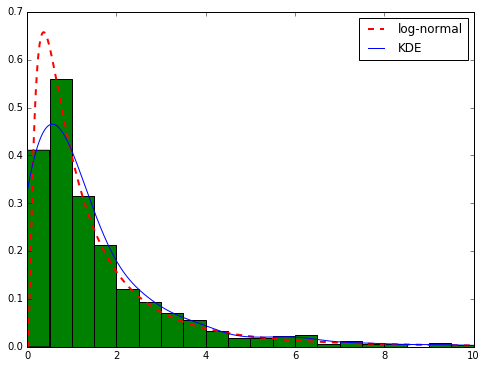

In [11]:
from scipy import stats
from matplotlib import pylab as plt
from pyqt_fit import kde, kde_methods
import numpy as np

f = stats.lognorm(1)
x = f.rvs(1000)
xs = np.r_[0:10:4096j]

fig = plt.figure(figsize=(8,6))

plt.hist(x, bins=20, range=(0,10), color='g', normed=True)
plt.plot(xs, f.pdf(xs), 'r--', lw=2, label='log-normal')
est = kde.KDE1D(x, method=kde_methods.linear_combination, lower=0)
plt.plot(xs, est(xs), color='b', label='KDE')
plt.legend(loc='best')

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/pyqt_fit/kde_methods.py:1107: RuntimeWarning: invalid value encountered in log
  fake_kde.lower = self.trans(kde.lower)
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/pyqt_fit/kde_methods.py:1129: RuntimeWarning: divide by zero encountered in log
  pts = trans(points)
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/pyqt_fit/kde_methods.py:976: RuntimeWarning: divide by zero encountered in divide
  return np.divide(1, x, out)


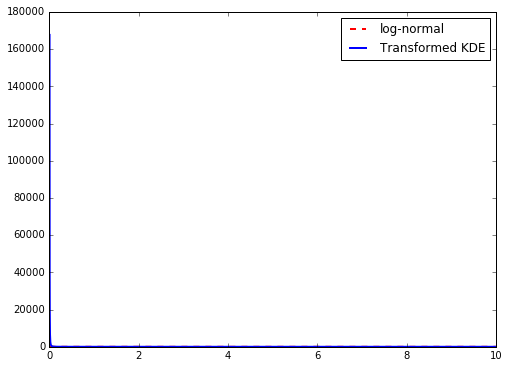

In [12]:
plt.figure(figsize=(8,6))
lx = np.log(x)

h, edges = np.histogram(lx, bins=30, range=(-np.log(30), np.log(10)))
width = np.exp(edges[1:]) - np.exp(edges[:-1])
h = h / width
h /= len(x)

plt.bar(np.exp(edges[:-1]), h, width = width, facecolor='g', linewidth=0, ecolor='b')
plt.plot(xs, f.pdf(xs), 'r--', lw=2, label='log-normal')
plt.xlim(xmax=10)
plt.legend(loc='best')

trans = kde.KDE1D(x, method=kde_methods.transformKDE1D(kde_methods.LogTransform))
plt.plot(xs, trans(xs), color='b', lw=2, label='Transformed KDE')
plt.legend(loc='best')
